<a href="https://colab.research.google.com/github/pwaila/scm/blob/master/product_data_outliar_analysis_scm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data=pd.read_excel("gdrive/My Drive/Supply chain/product_data.xlsx")

In [5]:
data.head()

,Customer,Day,Browser,Time (min),Pages Viewed,Amount Spent ($)
0,1,Mon,Internet Explorer,12.0,4,54.52
1,2,Wed,Other,19.5,6,94.90
2,3,Mon,Internet Explorer,8.5,4,26.68
3,4,Tue,Firefox,11.4,2,44.73
4,5,Wed,Internet Explorer,11.3,4,66.27


first quantile

In [0]:
q1=data['Amount Spent ($)'].quantile(.25) 

second quantile

In [0]:
q2=data['Amount Spent ($)'].quantile(.5) 

third quantile

In [0]:
q3=data['Amount Spent ($)'].quantile(.75) 

interquantile difference

In [9]:
q3-q1

31.9825

lower limit

In [10]:
lowerLimit =q1-(1.5*(q3-q1))
lowerLimit

-2.4137500000000003

upper limit

In [11]:
upperLimit =q3+(1.5*(q3-q1))
upperLimit

125.51625000000001

find outlier

In [12]:
  [x for x in data['Amount Spent ($)'] if ((x > upperLimit) or (x<lowerLimit))]

[158.51, 126.4, 155.3]

minimum values

In [13]:
data['Amount Spent ($)'].min()

26.68

maximum value

In [14]:
data['Amount Spent ($)'].max()

158.51

Correlation

In [21]:
cor=data.corr(method ='pearson')
cor

,Customer,Time (min),Pages Viewed,Amount Spent ($)
Customer,1.000000,0.072266,0.149790,0.147890
Time (min),0.072266,1.000000,0.656056,0.627613
Pages Viewed,0.149790,0.656056,1.000000,0.775453
Amount Spent ($),0.147890,0.627613,0.775453,1.000000


ploting heatmap for correlation

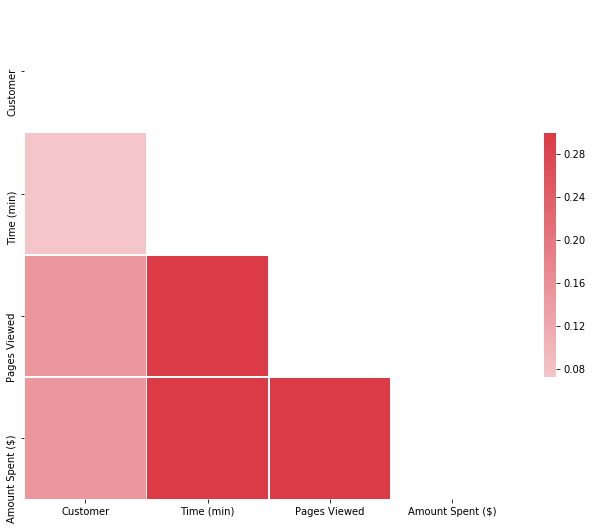

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

# Generate a mask for the upper triangle
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

calculating skewness

In [17]:
data['Amount Spent ($)'].skew()

1.2905072374090052

calculating kurtosis

In [18]:
data['Amount Spent ($)'].kurtosis()

1.3821052641210305